# Disease Risk Prediction Project - Heart Disease & Diabetes

### Description: This notebook covers the data preprocessing, merging, and model training steps for a disease risk prediction model.


In [369]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Explore the datasets


In [370]:
# Loading the datasets
heart = pd.read_csv('heart.csv')
dib = pd.read_csv('diabetes.csv')
# display first few rows of each dataset to understand the dataset structure 
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [298]:
dib.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [299]:
# Heart disease and Diabetes dataset info
print( heart.info(),"\n")
print( dib.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  ---

In [300]:
print(heart.nunique(),'\n')
print(dib.nunique())

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64 

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


## Preprocessing the datasets

In [301]:
# checking for null values
print(heart.isnull().sum(),"\n")
print(dib.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<Axes: title={'center': 'Correlation Heatmap for Diabetes Dataset'}>

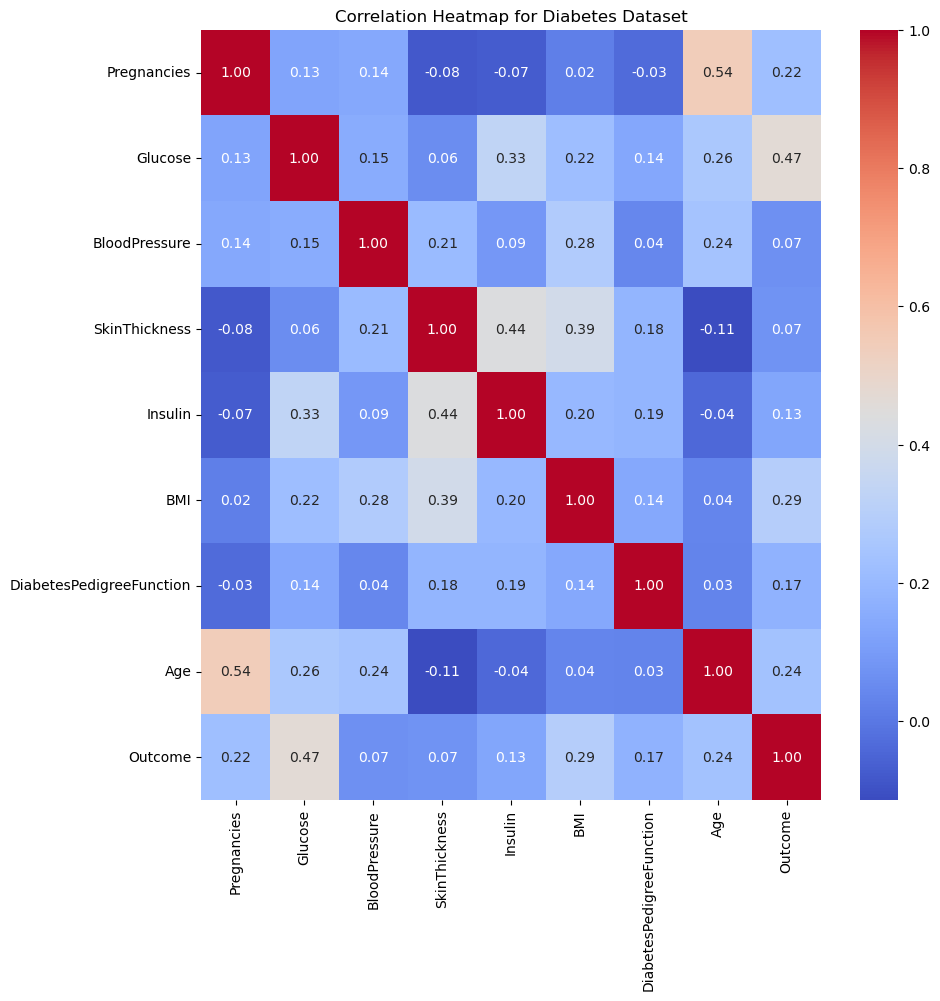

In [302]:
# Correlation heatmap for the Diabetes dataset
corr1 = dib.corr()
plt.figure(figsize=(10,10))
plt.title("Correlation Heatmap for Diabetes Dataset")
sns.heatmap(corr1, annot= True, cmap='coolwarm', fmt='.2f')

<Axes: title={'center': 'Correlation Heatmap for heart disease Dataset'}>

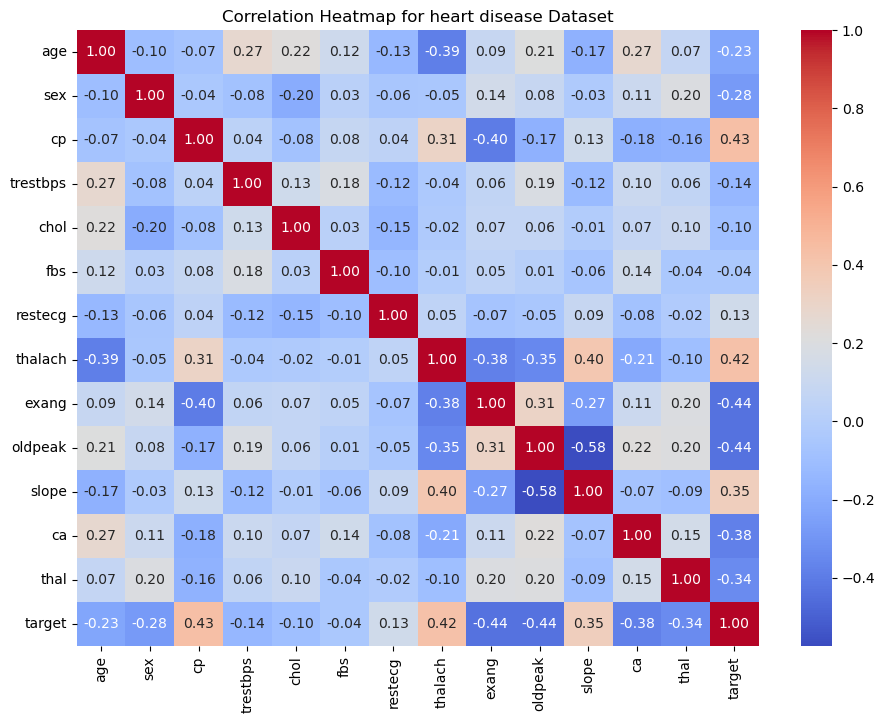

In [303]:
# Correlation heatmap for the Heart disease dataset
corr2 = heart.corr()
plt.figure(figsize=(11,8))
plt.title("Correlation Heatmap for heart disease Dataset")
sns.heatmap(corr2, annot= True, cmap='coolwarm', fmt='.2f')

In [371]:
heart = heart.drop(columns= ['exang', 'oldpeak', 'ca', 'thal'])

In [372]:
dib.rename(columns={'Age':'age_dib'}, inplace=True)
heart.rename(columns={'age':'age_heart'}, inplace=True)

In [373]:
# Adding multi-label target
# For diabetes dataset: renaming `Outcome` to `diabetes` and adding `heart_disease` column with values as 0

dib = dib.rename(columns={'Outcome':'diabetes'})
dib['heart_disease'] = 0
# For heart disease dataset: renaming `target` to `heart_disease` and adding `diabetes` column with values as 0

heart = heart.rename(columns={'target':'heart_disease'})
heart['diabetes'] = 0

In [374]:
# Creating duplicate columns for heart features in dib with default values
dib['age_heart'] = 0
dib['sex'] = 0
dib['cp'] = 0
dib['trestbps'] = 0
dib['chol'] = 0
dib['fbs'] = 0
dib['restecg'] = 0
dib['thalach'] = 0
dib['slope'] = 0


## Concatenating Diabetes and Heart Disease Datasets


In [375]:
print(dib.shape)
print(heart.shape)

(768, 19)
(1025, 11)


In [376]:
print(dib.columns)
print(heart.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'age_dib', 'diabetes',
       'heart_disease', 'age_heart', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalach', 'slope'],
      dtype='object')
Index(['age_heart', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'slope', 'heart_disease', 'diabetes'],
      dtype='object')


In [377]:
# Concatenate the datasets
new = pd.concat([dib, heart], ignore_index=True)
new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,age_dib,diabetes,heart_disease,age_heart,sex,cp,trestbps,chol,fbs,restecg,thalach,slope
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1,0,0,0,0,0,0,0,0,0,0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0,0,0,0,0,0,0,0,0,0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1,0,0,0,0,0,0,0,0,0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1,0,0,0,0,0,0,0,0,0,0


In [378]:
new.isnull().sum()

Pregnancies                 1025
Glucose                     1025
BloodPressure               1025
SkinThickness               1025
Insulin                     1025
BMI                         1025
DiabetesPedigreeFunction    1025
age_dib                     1025
diabetes                       0
heart_disease                  0
age_heart                      0
sex                            0
cp                             0
trestbps                       0
chol                           0
fbs                            0
restecg                        0
thalach                        0
slope                          0
dtype: int64

In [379]:
# Fill NaN values with 0 for the entire dataset
new.fillna(0, inplace=True)
new.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
age_dib                     0
diabetes                    0
heart_disease               0
age_heart                   0
sex                         0
cp                          0
trestbps                    0
chol                        0
fbs                         0
restecg                     0
thalach                     0
slope                       0
dtype: int64

In [380]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1793 entries, 0 to 1792
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1793 non-null   float64
 1   Glucose                   1793 non-null   float64
 2   BloodPressure             1793 non-null   float64
 3   SkinThickness             1793 non-null   float64
 4   Insulin                   1793 non-null   float64
 5   BMI                       1793 non-null   float64
 6   DiabetesPedigreeFunction  1793 non-null   float64
 7   age_dib                   1793 non-null   float64
 8   diabetes                  1793 non-null   int64  
 9   heart_disease             1793 non-null   int64  
 10  age_heart                 1793 non-null   int64  
 11  sex                       1793 non-null   int64  
 12  cp                        1793 non-null   int64  
 13  trestbps                  1793 non-null   int64  
 14  chol    

In [381]:
# Creating a single 'age' feature
new['age'] = new['age_dib'].combine_first(new['age_heart'])
new.drop(['age_dib', 'age_heart'], axis=1, inplace=True)
new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,diabetes,heart_disease,sex,cp,trestbps,chol,fbs,restecg,thalach,slope,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,1,0,0,0,0,0,0,0,0,0,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,0,0,0,0,0,0,0,0,0,0,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,1,0,0,0,0,0,0,0,0,0,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,0,0,0,0,0,0,0,0,0,0,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,1,0,0,0,0,0,0,0,0,0,33.0


<Axes: xlabel='age', ylabel='Count'>

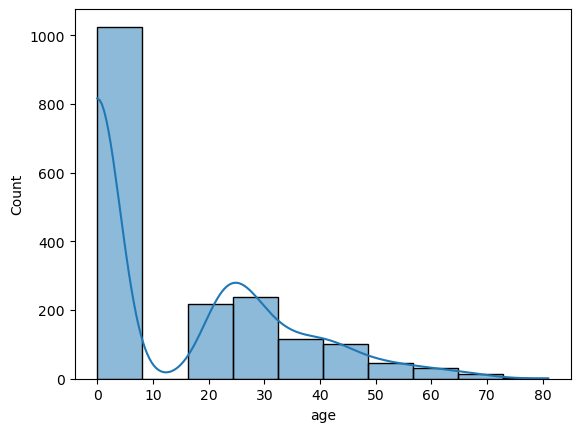

In [382]:
#checking the distribution of the new age col
sns.histplot(new['age'], kde=True, bins=10)

In [383]:
new['age'].describe()

count    1793.000000
mean       14.238148
std        18.163434
min         0.000000
25%         0.000000
50%         0.000000
75%        27.000000
max        81.000000
Name: age, dtype: float64

In [384]:
new['age'].unique()

array([50., 31., 32., 21., 33., 30., 26., 29., 53., 54., 34., 57., 59.,
       51., 27., 41., 43., 22., 38., 60., 28., 45., 35., 46., 56., 37.,
       48., 40., 25., 24., 58., 42., 44., 39., 36., 23., 61., 69., 62.,
       55., 65., 47., 52., 66., 49., 63., 67., 72., 81., 64., 70., 68.,
        0.])

In [385]:
# The minimum age is 0, which is highly unusual and likely indicates an entry error 
# replacing 0 with NaN
new['age']=new['age'].replace(0,np.nan)

In [386]:
new['age'].unique()

array([50., 31., 32., 21., 33., 30., 26., 29., 53., 54., 34., 57., 59.,
       51., 27., 41., 43., 22., 38., 60., 28., 45., 35., 46., 56., 37.,
       48., 40., 25., 24., 58., 42., 44., 39., 36., 23., 61., 69., 62.,
       55., 65., 47., 52., 66., 49., 63., 67., 72., 81., 64., 70., 68.,
       nan])

In [387]:
#using imputation to fill the NaN values
median_age = new['age'].median()
#imputing NaN with median age
new['age'].fillna(median_age, inplace=True)
new['age'].describe()

count    1793.000000
mean       30.816509
std         7.975081
min        21.000000
25%        29.000000
50%        29.000000
75%        29.000000
max        81.000000
Name: age, dtype: float64

In [388]:
new['age'].unique()

array([50., 31., 32., 21., 33., 30., 26., 29., 53., 54., 34., 57., 59.,
       51., 27., 41., 43., 22., 38., 60., 28., 45., 35., 46., 56., 37.,
       48., 40., 25., 24., 58., 42., 44., 39., 36., 23., 61., 69., 62.,
       55., 65., 47., 52., 66., 49., 63., 67., 72., 81., 64., 70., 68.])

<Axes: xlabel='age', ylabel='Count'>

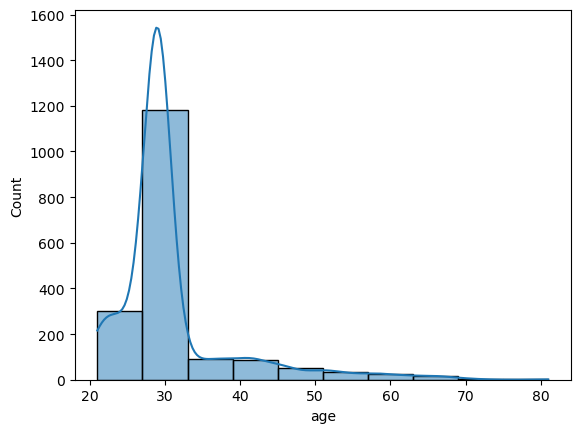

In [389]:
sns.histplot(new['age'], kde=True, bins=10)

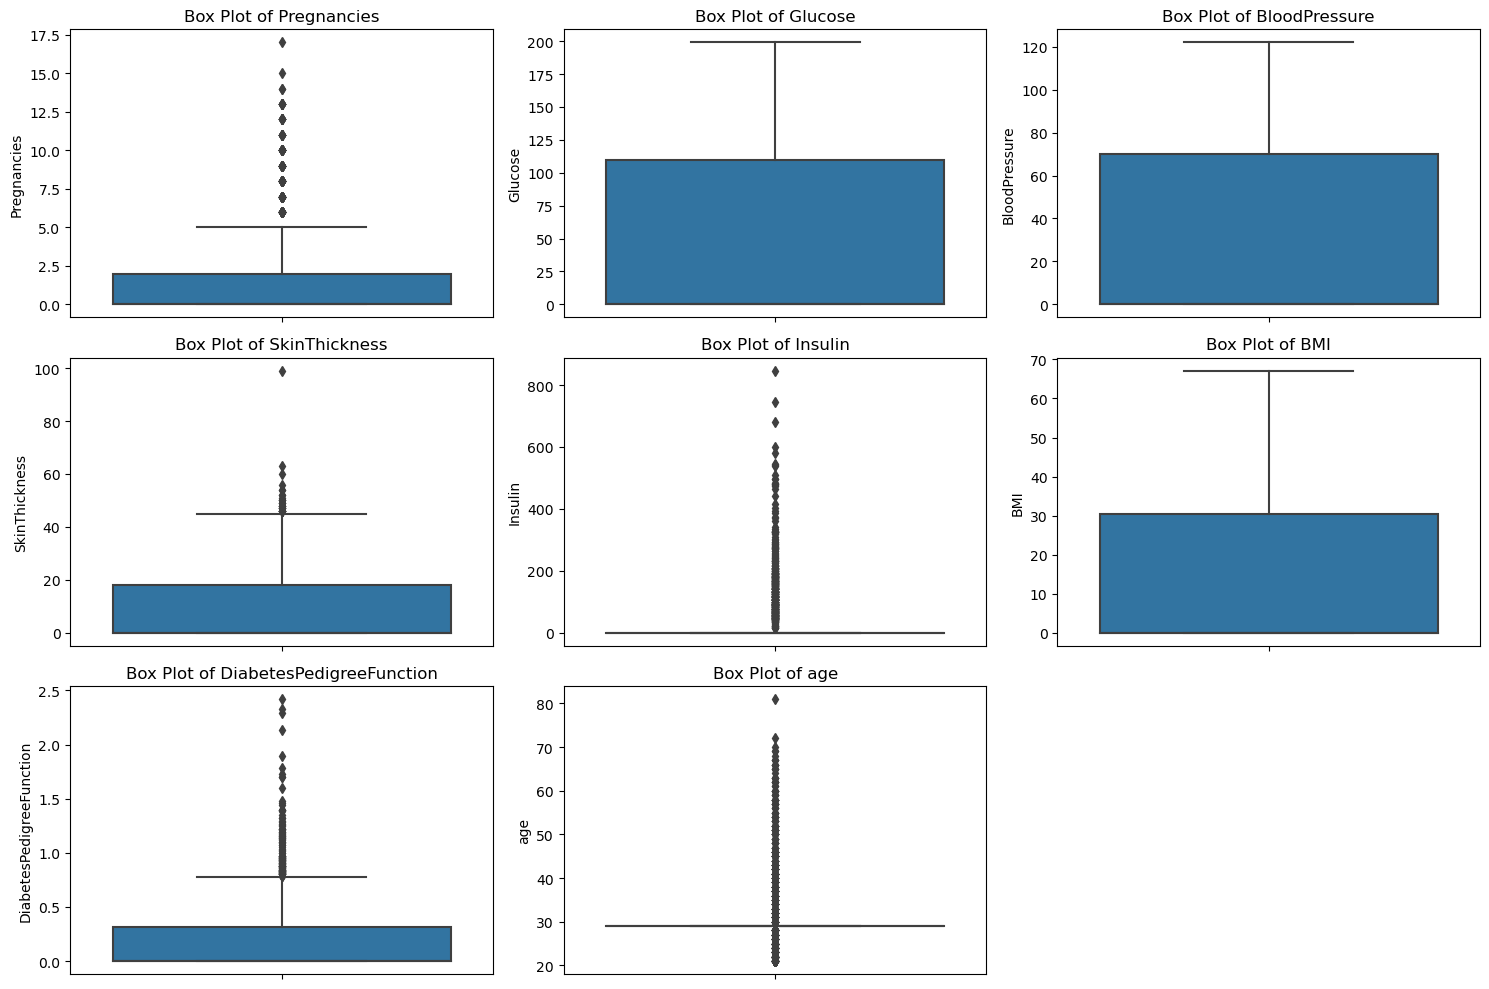

In [390]:
# List of continuous features to visualize
continuous_features = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'age'
]

# Create a figure for box plots
plt.figure(figsize=(15, 10))

for i, feature in enumerate(continuous_features):
    plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns
    sns.boxplot(y=new[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

<Axes: >

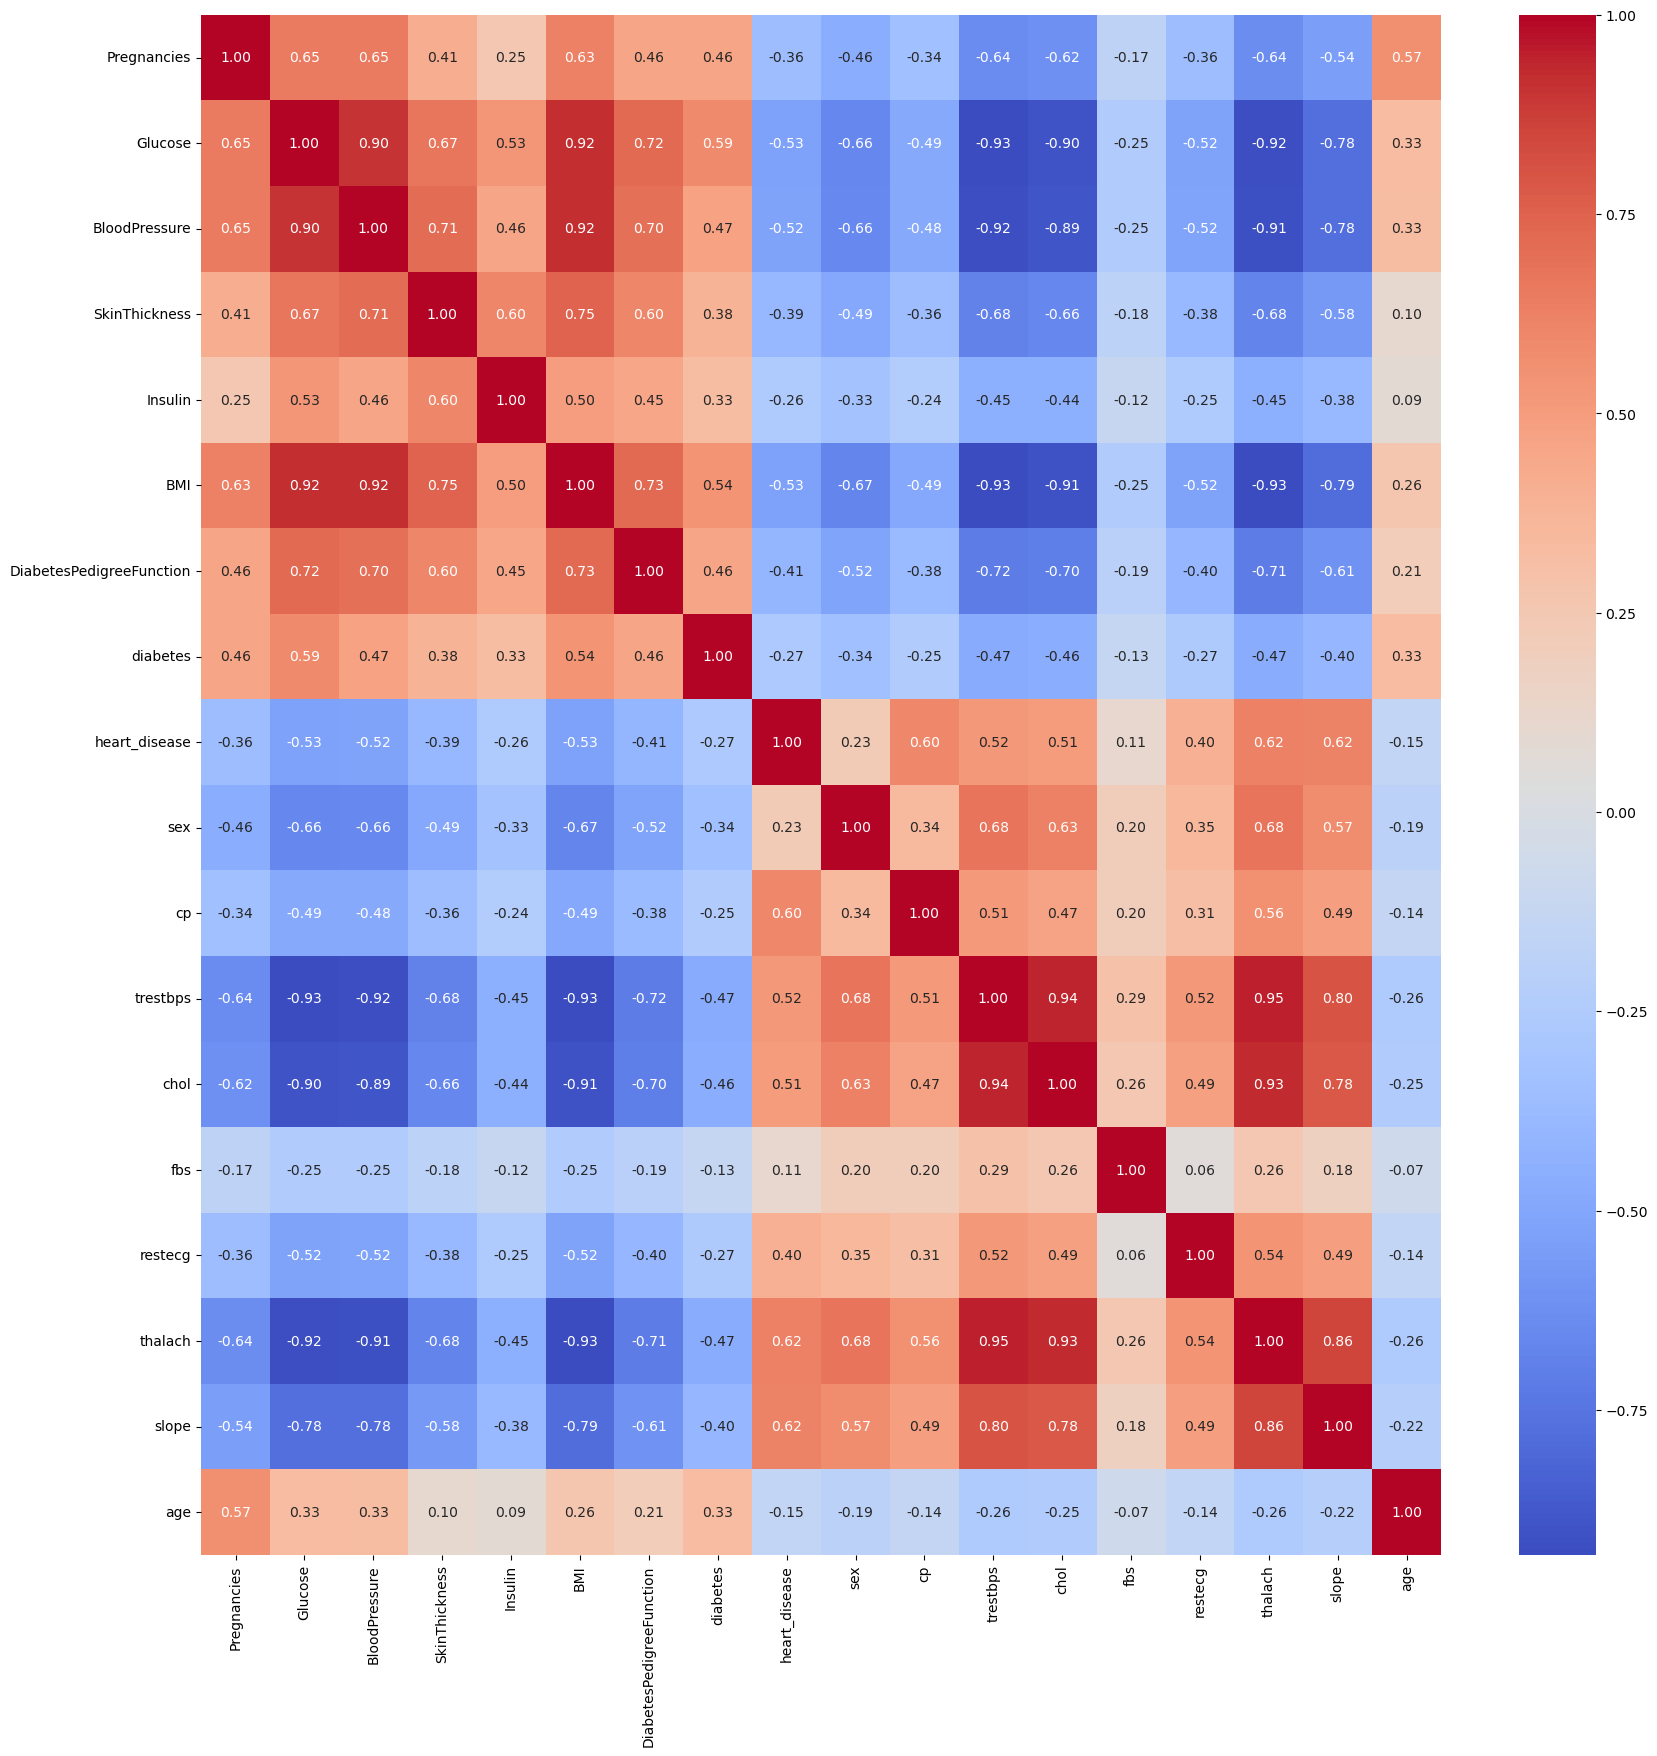

In [391]:
corr = new.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True, cmap='coolwarm',fmt='.2f')

In [392]:
print(new['Pregnancies'].value_counts())
print(new['Glucose'].value_counts())
print(new['BloodPressure'].value_counts())
print(new['SkinThickness'].value_counts())
print(new['Insulin'].value_counts())
print(new['BMI'].value_counts())
print(new['DiabetesPedigreeFunction'].value_counts())
print(new['age'].value_counts())

Pregnancies
0.0     1136
1.0      135
2.0      103
3.0       75
4.0       68
5.0       57
6.0       50
7.0       45
8.0       38
9.0       28
10.0      24
11.0      11
13.0      10
12.0       9
14.0       2
15.0       1
17.0       1
Name: count, dtype: int64
Glucose
0.0      1030
100.0      17
99.0       17
106.0      14
125.0      14
         ... 
191.0       1
177.0       1
44.0        1
62.0        1
190.0       1
Name: count, Length: 136, dtype: int64
BloodPressure
0.0      1060
70.0       57
74.0       52
78.0       45
68.0       45
72.0       44
64.0       43
80.0       40
76.0       39
60.0       37
62.0       34
66.0       30
82.0       30
88.0       25
84.0       23
90.0       22
86.0       21
58.0       21
50.0       13
56.0       12
52.0       11
54.0       11
75.0        8
92.0        8
65.0        7
85.0        6
94.0        6
48.0        5
96.0        4
44.0        4
100.0       3
106.0       3
98.0        3
110.0       3
55.0        2
108.0       2
104.0       2
46.0    

Text(0.5, 1.0, 'Cholesterol Distribution')

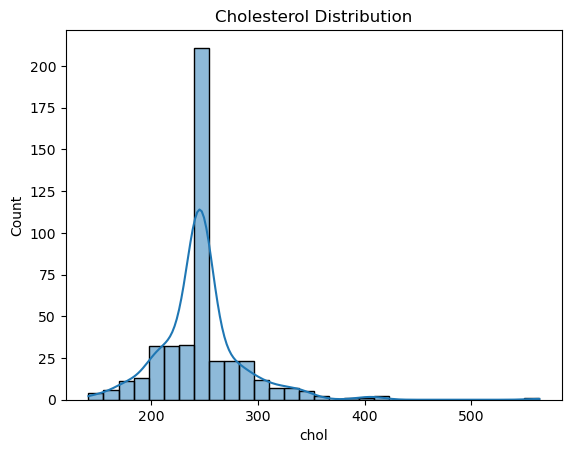

In [393]:
sns.histplot(X_test['chol'], bins=30, kde=True)
plt.title('Cholesterol Distribution')

Text(0.5, 1.0, 'Resting Blood Pressure Distribution')

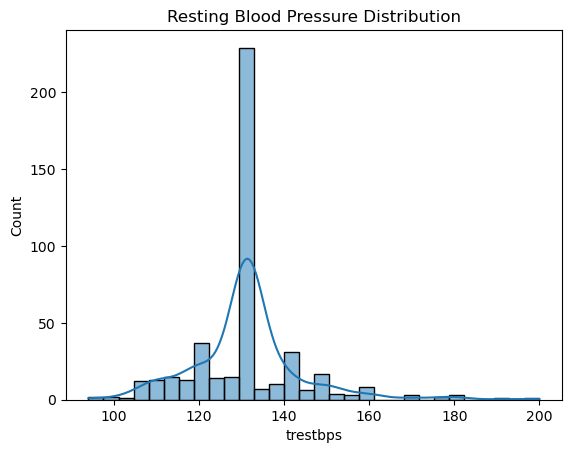

In [394]:
sns.histplot(X_test['trestbps'], bins=30, kde=True)
plt.title('Resting Blood Pressure Distribution')

In [395]:
new.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'diabetes', 'heart_disease', 'sex',
       'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'slope', 'age'],
      dtype='object')

In [396]:
new['chol'].value_counts()

chol
0      768
204     21
234     21
197     19
212     18
      ... 
185      3
200      3
210      3
242      3
141      3
Name: count, Length: 153, dtype: int64

In [397]:
new['trestbps'].value_counts()

trestbps
0      768
120    128
130    123
140    107
110     64
150     55
138     45
128     39
125     38
160     36
112     30
132     28
118     24
108     21
124     20
135     20
145     17
134     17
152     17
170     15
100     14
122     14
136     11
126     10
180     10
142      9
115      9
105      9
146      8
148      7
178      7
94       7
144      6
102      6
154      4
117      4
165      4
200      4
114      4
123      4
192      3
106      3
104      3
129      3
174      3
155      3
172      3
164      3
156      3
101      3
Name: count, dtype: int64

In [398]:
chol_mean = new['chol'].replace(0, pd.NA).mean()
trestbps_mean = new['trestbps'].replace(0, pd.NA).mean()

In [399]:
new['chol'].replace(0, chol_mean, inplace=True)
new['trestbps'].replace(0, trestbps_mean,inplace=True)


In [400]:
new['trestbps'].value_counts()

trestbps
131.611707    768
120.000000    128
130.000000    123
140.000000    107
110.000000     64
150.000000     55
138.000000     45
128.000000     39
125.000000     38
160.000000     36
112.000000     30
132.000000     28
118.000000     24
108.000000     21
124.000000     20
135.000000     20
145.000000     17
134.000000     17
152.000000     17
170.000000     15
100.000000     14
122.000000     14
136.000000     11
126.000000     10
180.000000     10
142.000000      9
115.000000      9
105.000000      9
146.000000      8
148.000000      7
178.000000      7
94.000000       7
144.000000      6
102.000000      6
154.000000      4
117.000000      4
165.000000      4
200.000000      4
114.000000      4
123.000000      4
192.000000      3
106.000000      3
104.000000      3
129.000000      3
174.000000      3
155.000000      3
172.000000      3
164.000000      3
156.000000      3
101.000000      3
Name: count, dtype: int64

In [401]:
# all feature in dib with zeros
features_with_zeros = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

# imputing zeros with mean values
for feature in features_with_zeros:
    mean_value=new[feature][new[feature]!=0].mean()
    new[feature]=new[feature].replace(0,mean_value)

In [402]:
for feature in features_with_zeros:
    print(new[feature].value_counts())
    print("\n")

Pregnancies
4.494673     1136
1.000000      135
2.000000      103
3.000000       75
4.000000       68
5.000000       57
6.000000       50
7.000000       45
8.000000       38
9.000000       28
10.000000      24
11.000000      11
13.000000      10
12.000000       9
14.000000       2
15.000000       1
17.000000       1
Name: count, dtype: int64


Glucose
121.686763    1030
100.000000      17
99.000000       17
106.000000      14
125.000000      14
              ... 
191.000000       1
177.000000       1
44.000000        1
62.000000        1
190.000000       1
Name: count, Length: 136, dtype: int64


BloodPressure
72.405184     1060
70.000000       57
74.000000       52
78.000000       45
68.000000       45
72.000000       44
64.000000       43
80.000000       40
76.000000       39
60.000000       37
62.000000       34
66.000000       30
82.000000       30
88.000000       25
84.000000       23
90.000000       22
86.000000       21
58.000000       21
50.000000       13
56.000000       12
52

<Axes: >

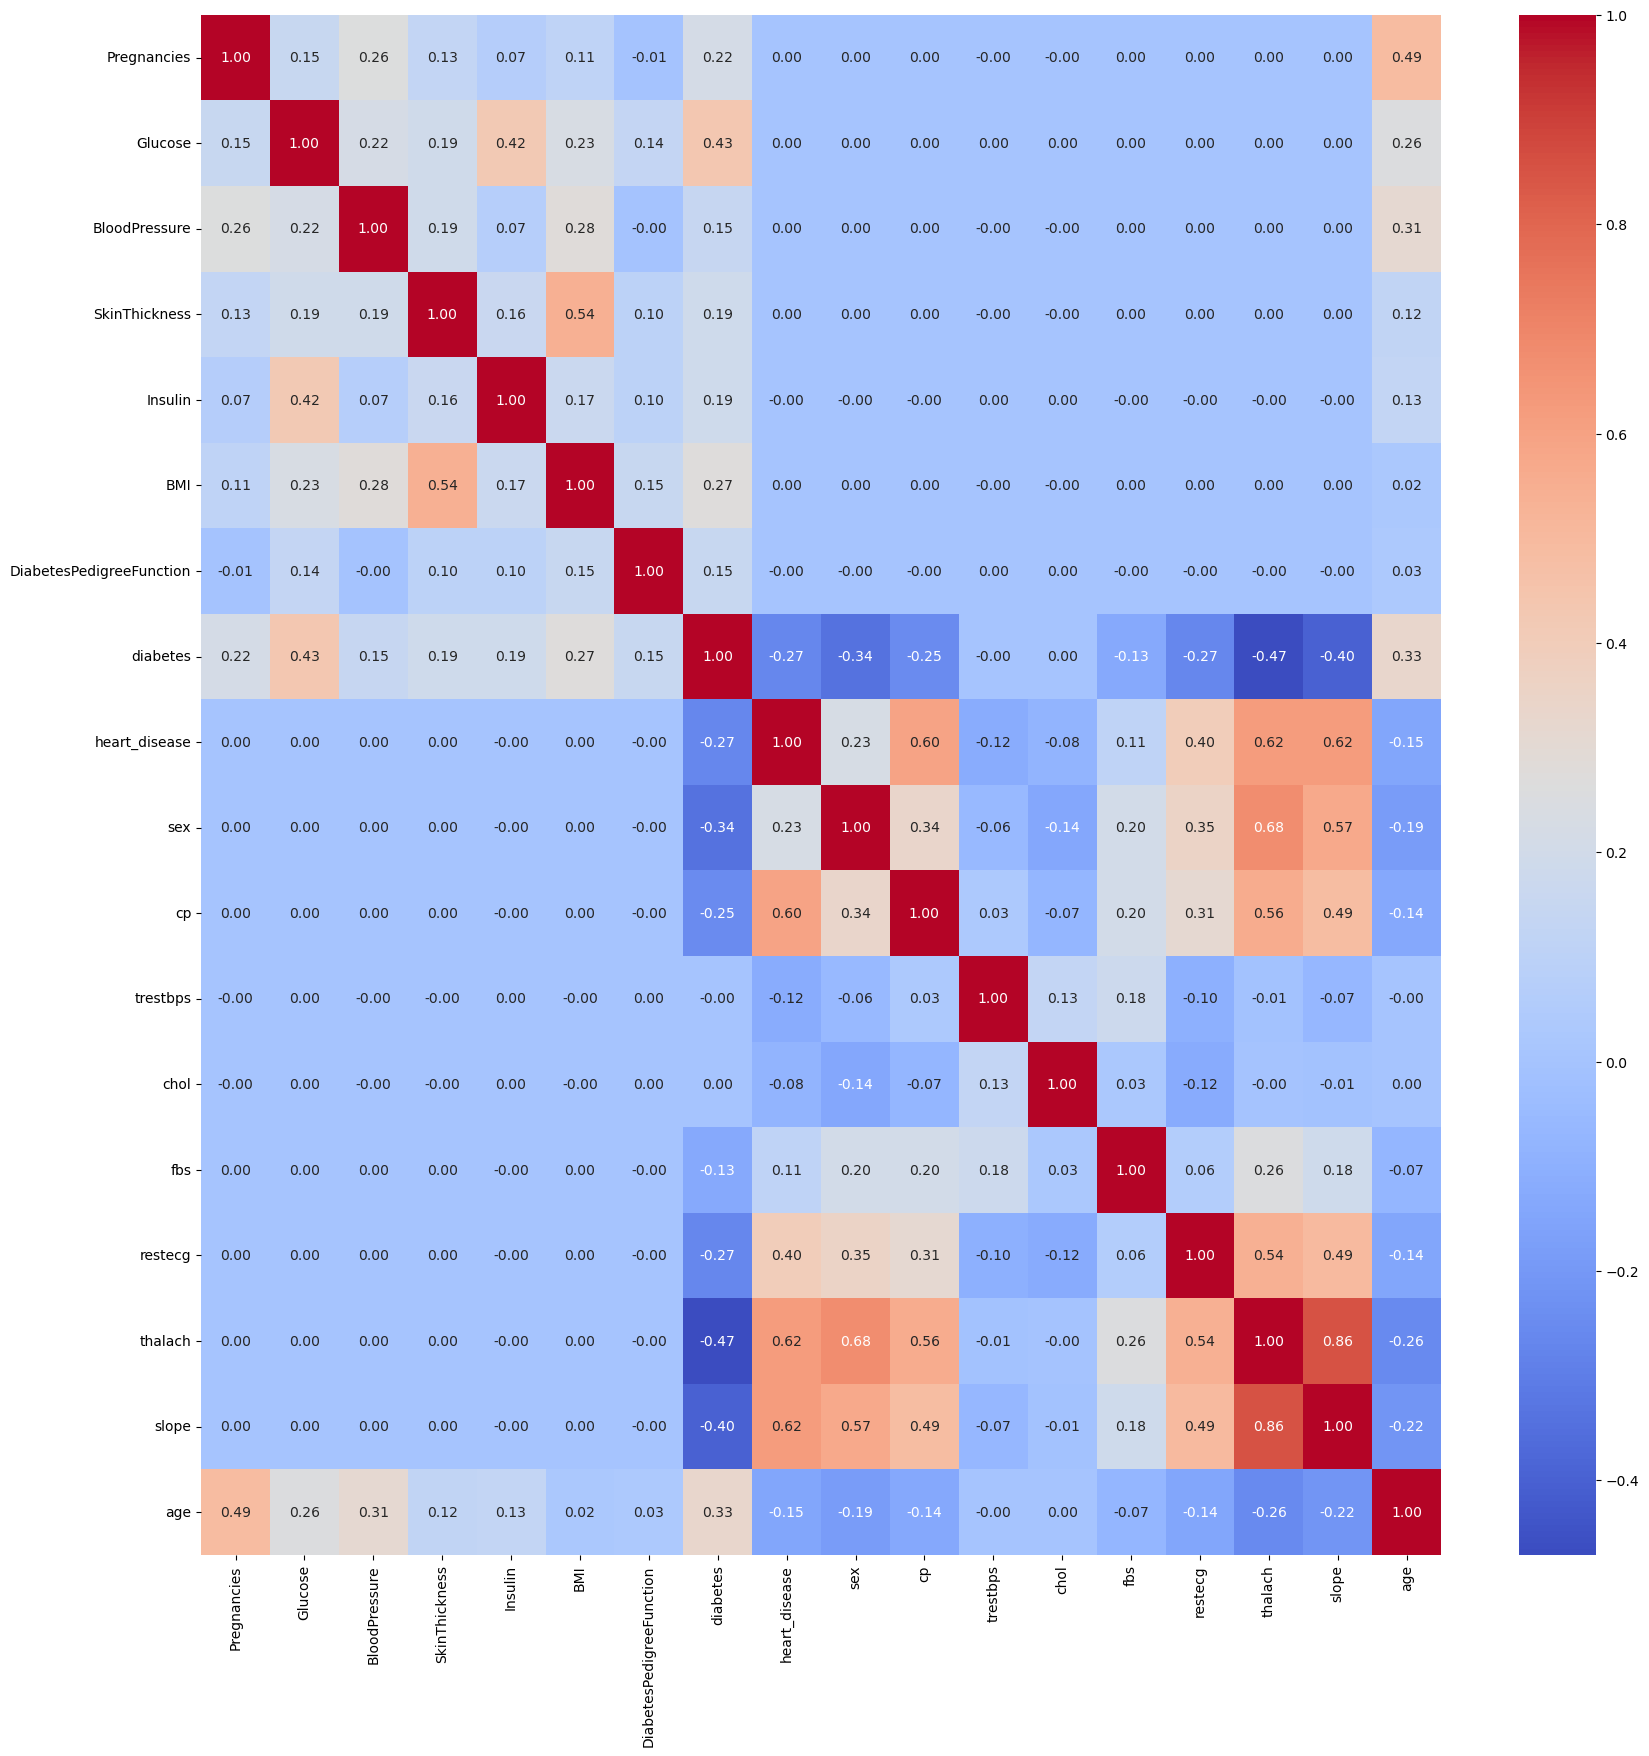

In [403]:
corr3 = new.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr3,annot=True, cmap='coolwarm',fmt='.2f')

In [404]:
new.drop(columns=['thalach'], inplace=True)

<Axes: >

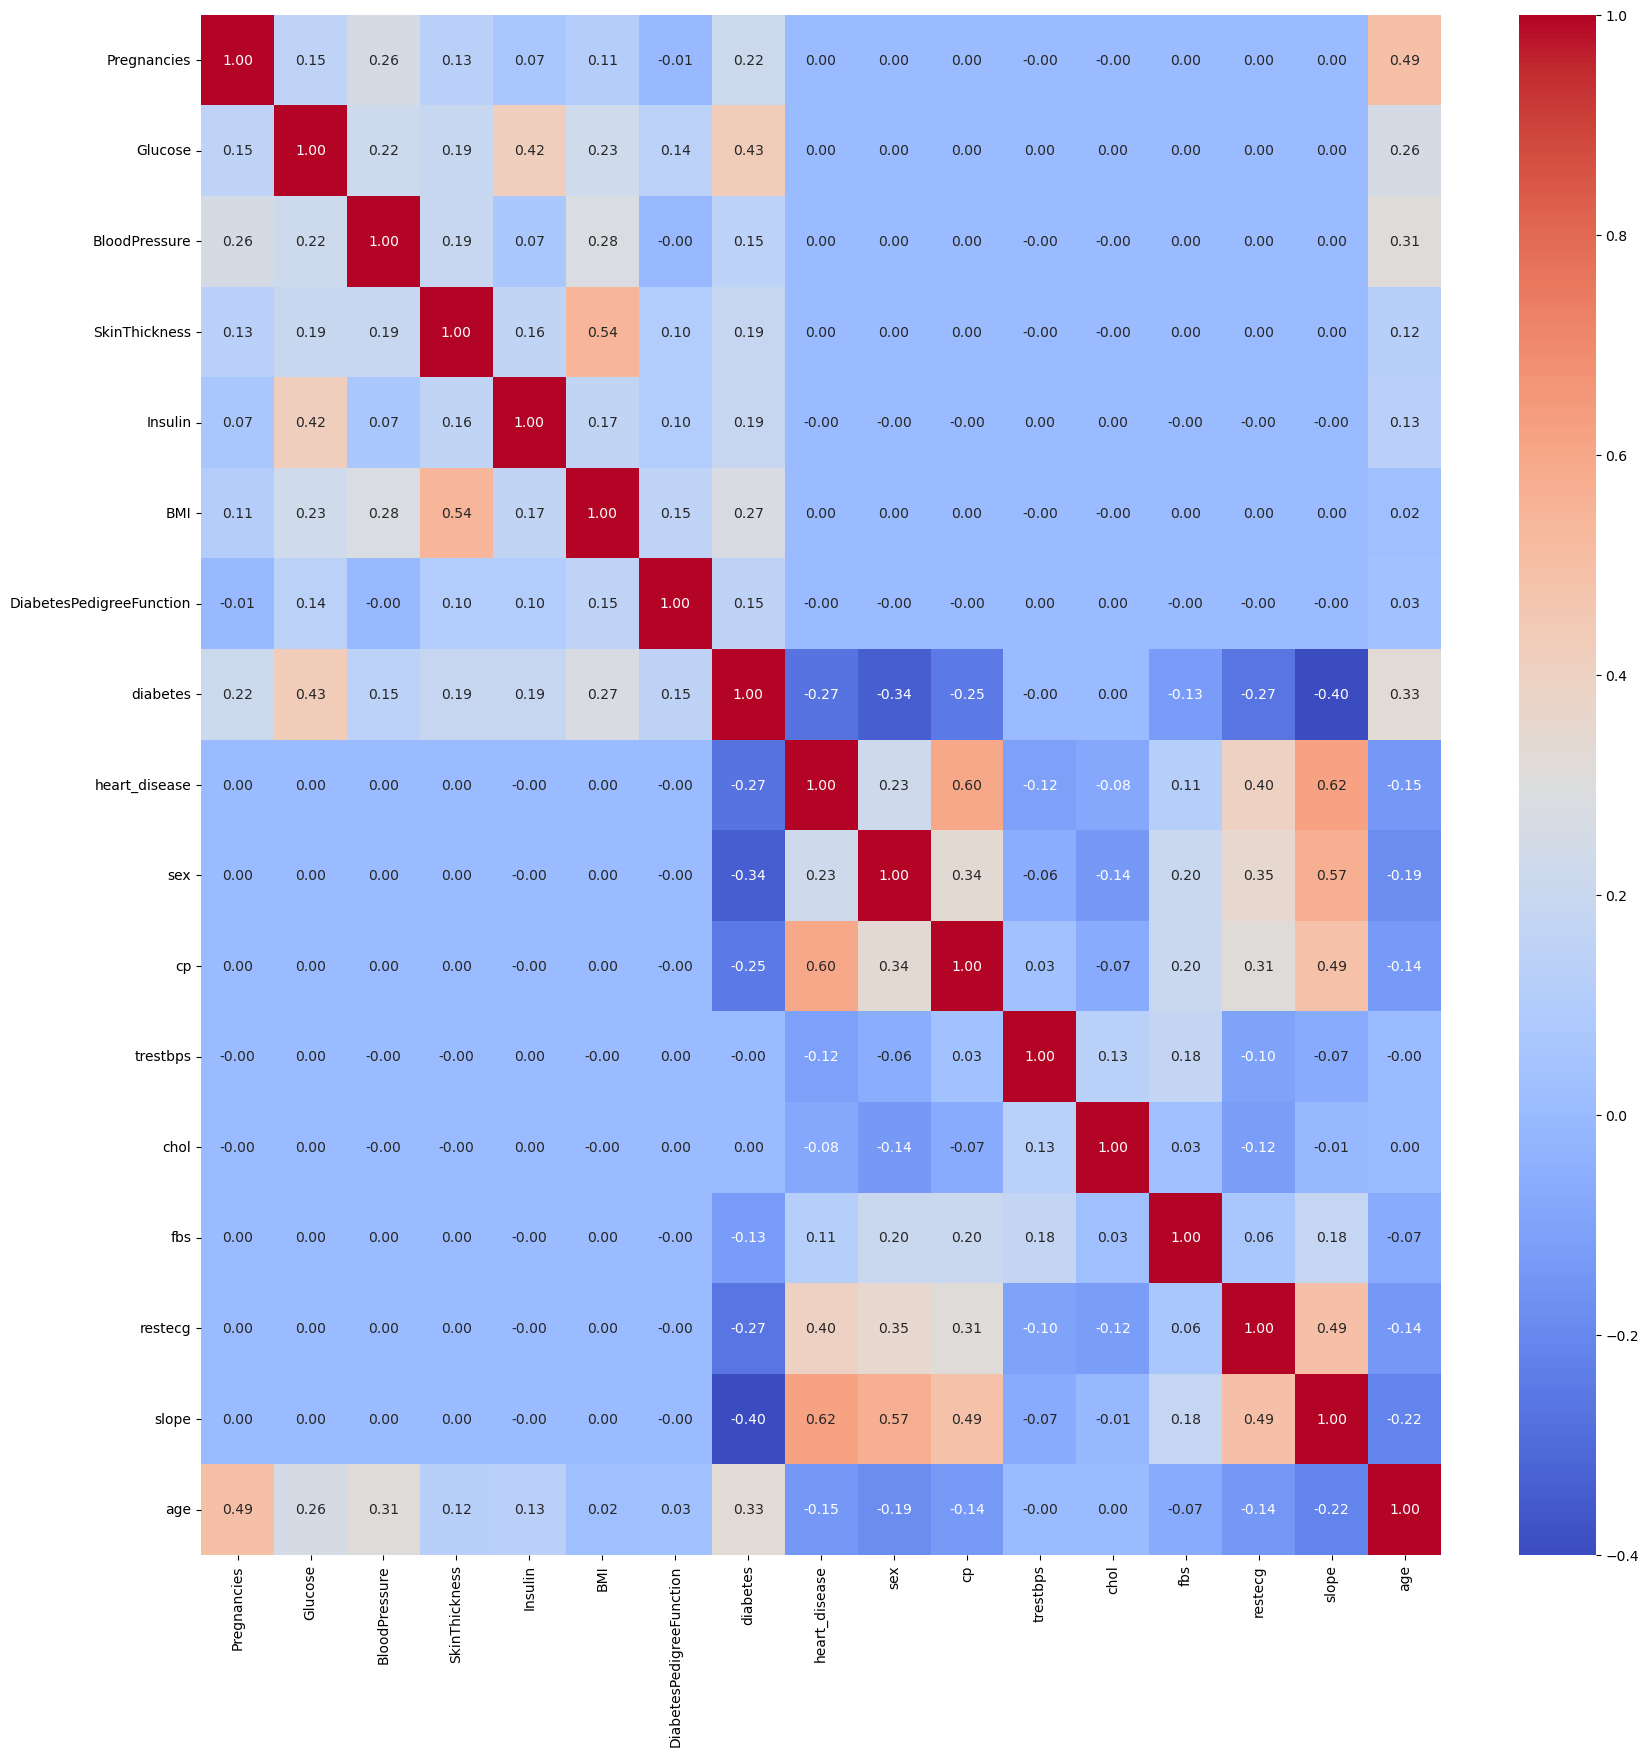

In [405]:
corr4 = new.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr4,annot=True, cmap='coolwarm',fmt='.2f')

In [458]:
#splitting data
X = new.drop(columns=['diabetes','heart_disease'])
y = new[['diabetes','heart_disease']]

In [459]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.multioutput import MultiOutputClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [460]:
from sklearn.linear_model import LogisticRegression

model1 = MultiOutputClassifier(LogisticRegression(max_iter=1000))
model1.fit(X_train_scaled, y_train)

MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000))

In [461]:
pred1 = model1.predict(X_test_scaled)
accuracy = accuracy_score(y_test, pred1)
cv_score = cross_val_score(model1, X, y, cv=5, scoring="accuracy").mean()
print("Accuracy: ", accuracy)
print("CV_SCORE: ",cv_score)
print("Classification Report: \n", classification_report(y_test, pred1, zero_division=0))



C:\Users\paulc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\paulc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy:  0.77728285077951
CV_SCORE:  0.766292152316335
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.57      0.62        53
           1       0.84      0.69      0.76       143

   micro avg       0.80      0.65      0.72       196
   macro avg       0.76      0.63      0.69       196
weighted avg       0.80      0.65      0.72       196
 samples avg       0.29      0.29      0.29       196



In [462]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train_scaled, y_train)

pred2 = model2.predict(X_test_scaled)
accuracy2 = accuracy_score(y_test, pred2)
cv_score = cross_val_score(model2, X, y, cv=5, scoring="accuracy").mean()
print("CV_SCORE: ",cv_score)
print("Accuracy: ", accuracy2)
print("Classification Report: \n", classification_report(y_test, pred2))

CV_SCORE:  0.8506590311386377
Accuracy:  0.8663697104677061
Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.55      0.49        53
           1       1.00      1.00      1.00       143

   micro avg       0.83      0.88      0.85       196
   macro avg       0.72      0.77      0.75       196
weighted avg       0.85      0.88      0.86       196
 samples avg       0.38      0.38      0.38       196



C:\Users\paulc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\paulc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [463]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(random_state=42)
model3.fit(X_train_scaled, y_train)

pred3 = model3.predict(X_test_scaled)
accuracy3 = accuracy_score(y_test, pred3)
cv_score = cross_val_score(model3, X, y, cv=5, scoring="accuracy").mean()
print("CV_SCORE: ",cv_score)
print("Accuracy: ", accuracy3)
print("Classification Report: \n", classification_report(y_test, pred3))

CV_SCORE:  0.8863151833927265
Accuracy:  0.9131403118040089
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.64      0.65        53
           1       1.00      0.98      0.99       143

   micro avg       0.91      0.89      0.90       196
   macro avg       0.83      0.81      0.82       196
weighted avg       0.91      0.89      0.90       196
 samples avg       0.39      0.39      0.39       196



C:\Users\paulc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\paulc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [464]:
print("ytest shape", y_test.shape)
print("pred shape", pred3.shape)

ytest shape (449, 2)
pred shape (449, 2)


In [465]:
new_test = {
    'Pregnancies': 6, 
    'Glucose': 190,                 
    'BloodPressure': 120,   
    'SkinThickness': 50,           
    'Insulin': 180,     
    'BMI': 45.0,           
    'DiabetesPedigreeFunction': 0.9,
    'sex': 1,                
    'cp': 3,
    'trestbps': 220,
    'chol': 300, 
    'fbs': 0,
    'restecg': 1,
    'slope': 2,
    'age': 55                         
}
new_test_df = pd.DataFrame([new_test])
new_test_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,sex,cp,trestbps,chol,fbs,restecg,slope,age
0,6,190,120,50,180,45.0,0.9,1,3,220,300,0,1,2,55


In [466]:
new_test_scaled = scaler.transform(new_test_df)

In [467]:
prediction = model3.predict(new_test_scaled)
print("Predicted class:", prediction)

Predicted class: [[0 0]]
